**Importing Libraries**

In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

**Gathering Data**

In [245]:
df = pd.read_csv("income.csv")

In [246]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [247]:
df.shape

(48842, 15)

In [248]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

**Data Cleaning**

In [249]:
df.isnull().sum(axis=0)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [250]:
df.dropna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**Dropping Null Values**

1. Removing missing values

In [251]:
missingvalues = ["?","NaN","N/a","NA","na"]
df = pd.read_csv("income.csv", na_values=missingvalues)

In [252]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [253]:
df = df.dropna()

In [254]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [255]:
df.shape

(45222, 15)

In [256]:
value = df['income'].isnull().values.any()
print(value)

False


2. Check if there are any duplicate values

In [257]:
df.duplicated().value_counts()

False    45175
True        47
dtype: int64

2(a) Dropping the 47 duplicate values

In [258]:
df = df.drop_duplicates()

In [259]:
display(df.drop_duplicates())

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [260]:
df.shape

(45175, 15)

In [261]:
type(df)

pandas.core.frame.DataFrame

2(b) Dropping the column "fnlgwt" as it doesn't provide any insight from that column

In [262]:
df.drop(df.columns[[2]], axis=1, inplace=True)

In [263]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [264]:
df.shape

(45175, 14)

**Exploratory Data Analysis**

In [265]:
print(df.dtypes)

age                 int64
workclass          object
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object


Text(0.5, 1.0, 'Box Plot for Age')

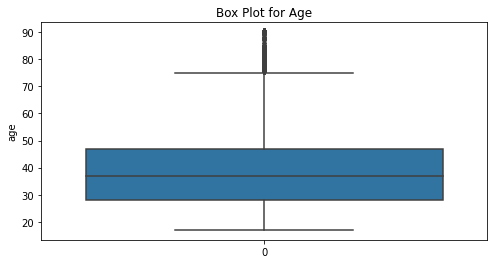

In [266]:
plt.figure(figsize=(8,4))
sns.boxplot(data = df["age"])
plt.ylabel("age")
plt.title("Box Plot for Age")

The median value of age is nearly 38.Also, the values of age is in between 18 and 75 and most of the values are from 28 to 48, which means **most employed persons** have ages in between **28 and 48**.

Text(0.5, 1.0, 'Histogram on Workclass')

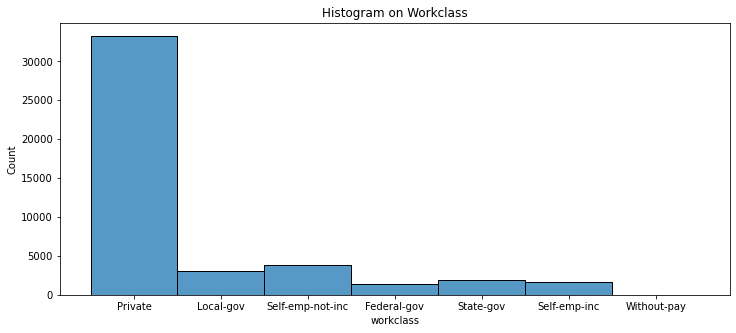

In [267]:
plt.figure(figsize=(12,5))
sns.histplot(data = df, x='workclass')
plt.title("Histogram on Workclass")

Most of the employees are from private sector

<AxesSubplot:ylabel='Categories of Workclass'>

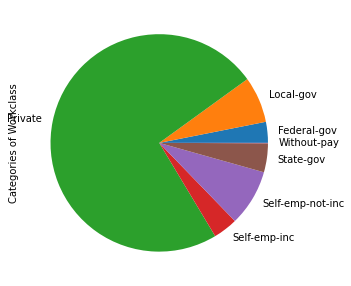

In [268]:
df.groupby('workclass').size().plot(kind='pie', label = "Categories of Workclass")

From the pie-plot, we can derive that most of the employees are from **private sector**.

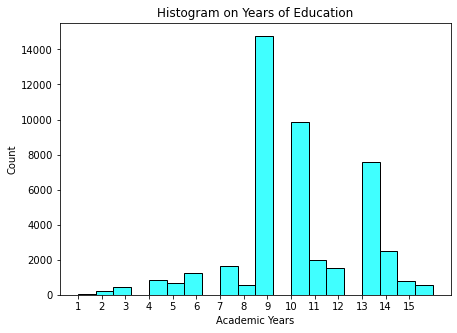

In [269]:
ax = sns.histplot(x= 'educational-num',data = df, color='Cyan',bins=20)
ax.set_xticks(range(1,16))

#specify axis labels
plt.xlabel('Academic Years')
plt.ylabel('Count')
plt.title('Histogram on Years of Education')

#display histogramplot
plt.show()

In [270]:
df['educational-num'].value_counts()

9     14770
10     9887
13     7559
14     2513
11     1958
7      1619
12     1507
6      1223
4       822
15      785
5       676
8       575
16      544
3       447
2       220
1        70
Name: educational-num, dtype: int64

According to the above histogram, nearly **33%** of people have **9 years of academic experience** before starting a job.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Never-married'),
  Text(1, 0, 'Married-civ-spouse'),
  Text(2, 0, 'Widowed'),
  Text(3, 0, 'Separated'),
  Text(4, 0, 'Divorced'),
  Text(5, 0, 'Married-spouse-absent'),
  Text(6, 0, 'Married-AF-spouse')])

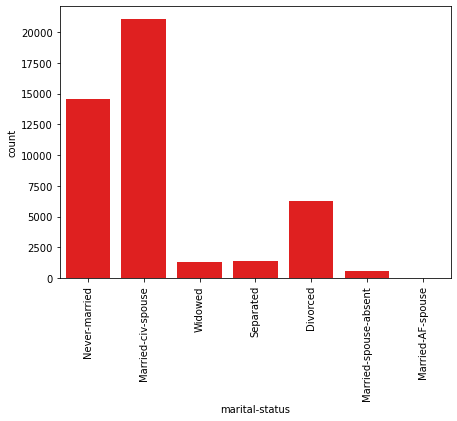

In [271]:
sns.countplot(x= 'marital-status',data = df, color='red')
plt.xticks(rotation=90)

**Married-civ-spouse** means married and is a spouse of civilian are the **highest number** of people with a job.

[Text(0, 0.5, 'Education Background'),
 Text(0.5, 1.0, 'Bar plot on different Educations')]

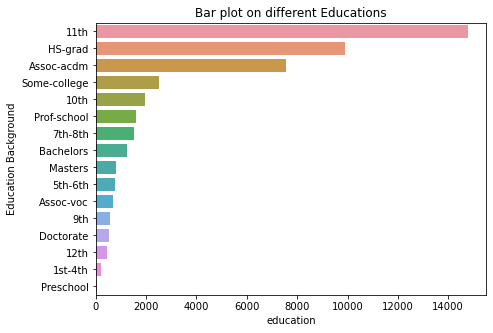

In [272]:
plt.figure(figsize=(7,5))
sns.barplot(y = df['education'].unique(),x = df['education'].value_counts()).set(ylabel = "Education Background",title = "Bar plot on different Educations")

Based on the barplot, the **minimum education** of any person that landed in a job is **11th standard**.

<AxesSubplot:xlabel='age', ylabel='income'>

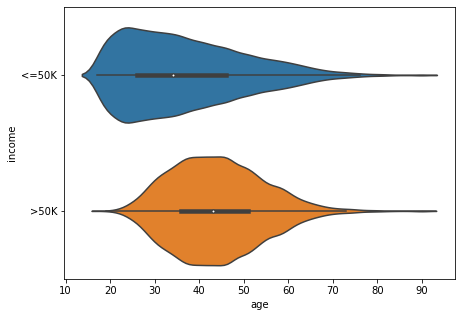

In [273]:
sns.violinplot(y = df['income'], x = df['age'])

Individuals between the ages of **23 and 46** are most likely to have an **income of less than or equal to 50K**, according to the violin plot. Furthermore, people begin **earning more than 50K at the age of 35 and continue to do so until they are 52**.

[Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Occupation'),
 Text(0.5, 1.0, 'Bar plot on different Occupations')]

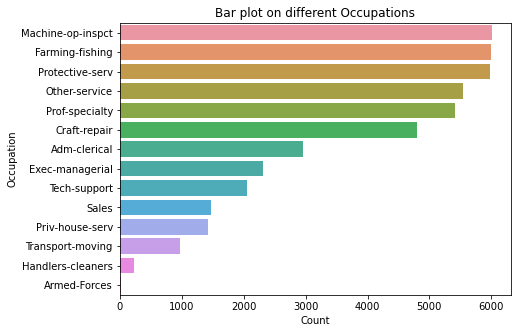

In [274]:
sns.barplot(y = df['occupation'].unique(),x = df['occupation'].value_counts()).set(xlabel = "Count", ylabel = "Occupation",title = "Bar plot on different Occupations")

From the above findings,almost **40% jobs** are available for machine operator and inspector, farming-fishing and Protective Service roles and people working for it.

Text(0.5, 1.0, 'KDE on Capital Loss')

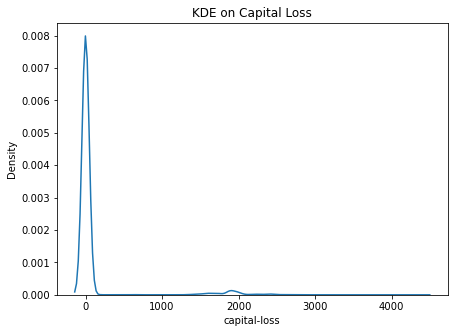

In [275]:
plt.figure(figsize=(7,5))
sns.kdeplot(df['capital-loss'])
plt.title("KDE on Capital Loss")

From the Kernel Density Estimation, it is clear that there are **no outliers** for the Capital loss column. Also, the mean values is near zero which means that there is **no loss incurred by individuals** from the sale of a capital asset, such as a stock, bond, or real estate.

<AxesSubplot:xlabel='age', ylabel='income'>

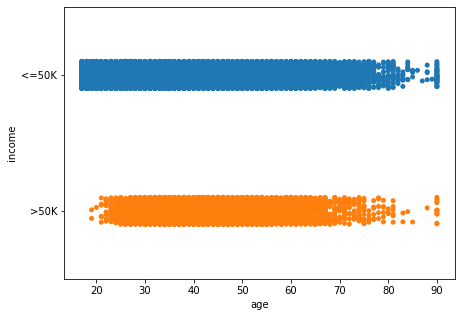

In [279]:
sns.stripplot(x = df['age'], y = df['income'])

From the strip plot, people with **age less than 20 and more than 70** mostly have income less than 50K.

Text(0.5, 1.0, 'Heat Map of all the Quantitative Values')

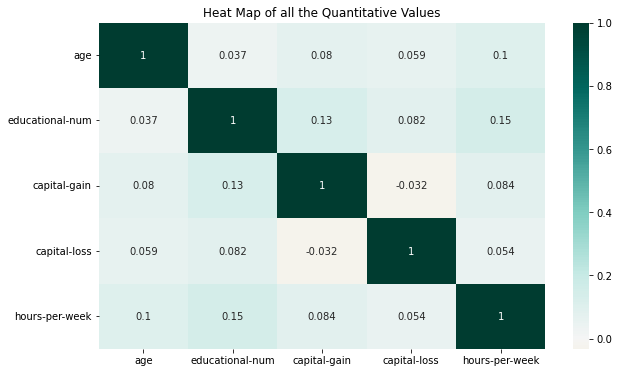

In [280]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), center=0, cmap='BrBG', annot=True)
plt.title("Heat Map of all the Quantitative Values")

From the heat map, we can say that there is no much correlation between the quantitative variables, but there is least correlation in few columns which are **educational-num** and **hours-per-week**, **capital-gain** and **educational-num** & **age** and **hours-per-week**.

Text(0.5, 1.0, 'Relation between Age and Hours per Week')

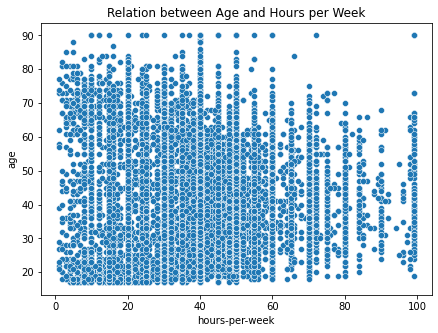

In [204]:
sns.scatterplot(data = df, x ="hours-per-week", y="age")
plt.title("Relation between Age and Hours per Week")

People above **80** years of age spend less time working over week.

Text(0.5, 1.0, 'Line plot on Hours spent on work for a week by an Individual')

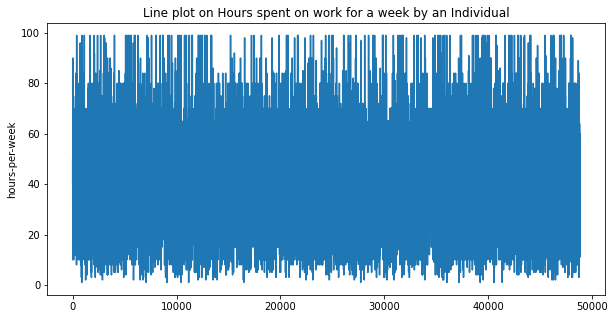

In [288]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df['hours-per-week'])
plt.title("Line plot on Hours spent on work for a week by an Individual")

Almost every individual spends **10 to 70 hours** in a week on their job.

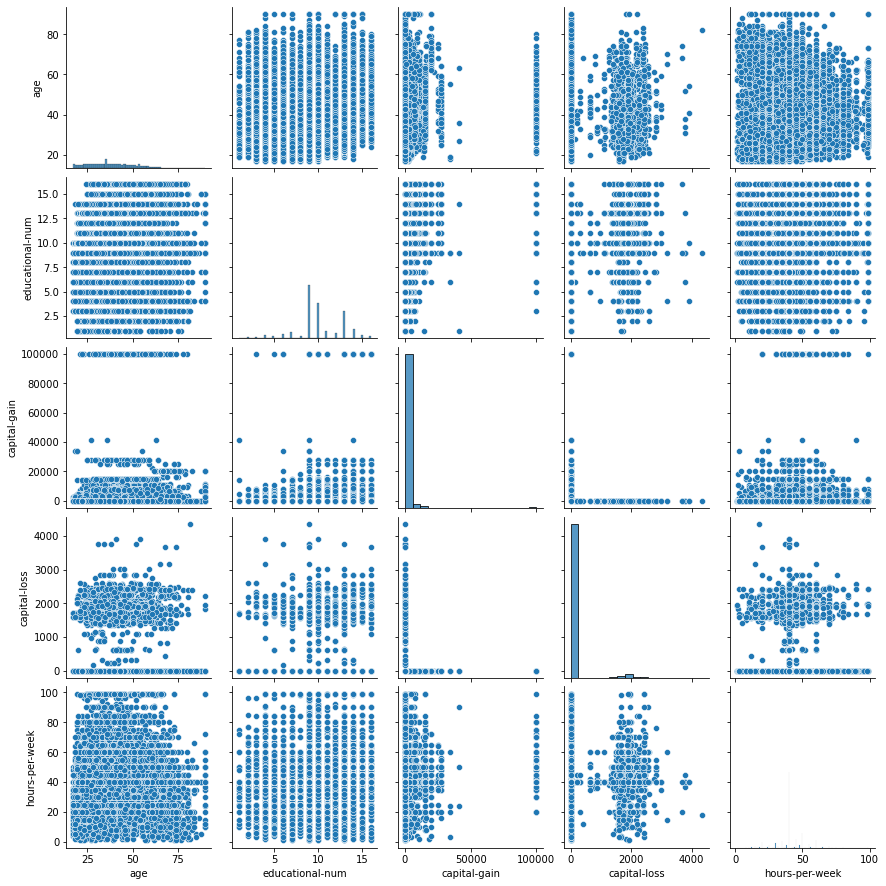

In [290]:
sns.pairplot(data = df)

**API EXTRACTION AND CONVERTING TO VECTORIZED DATA**

In [208]:
import requests

url = ('https://newsapi.org/v2/everything?''q=adults income&''apiKey=18071091481841b1910d5ae638bfef59')

response = requests.get(url)

print(response.json)

<bound method Response.json of <Response [200]>>


In [209]:
jsontxt = response.json()

In [210]:
response.content

b'{"status":"ok","totalResults":1342,"articles":[{"source":{"id":"business-insider","name":"Business Insider"},"author":"insider@insider.com (Kelly Burch)","title":"When I realized how much we spent on my dad in a nursing home, I looked into claiming him as a dependent","description":"Adults can be claimed as dependents if their income is low and you support them financially, but the rules are pretty specific.","url":"https://www.businessinsider.com/personal-finance/claim-parent-as-dependent-taxes-nursing-home-2023-1","urlToImage":"https://i.insider.com/620d1474b20df700180a1bbf?width=1200&format=jpeg","publishedAt":"2023-01-20T16:40:00Z","content":"Insider\'s experts choose the best products and services to help make smart decisions with your money (heres how). In some cases, we receive a commission from our partners, however, our opinions are o\xe2\x80\xa6 [+4097 chars]"},{"source":{"id":null,"name":"The Guardian"},"author":"Alexandra Topping","title":"Mental health of people in Wales

In [211]:
filename="Adult_Income_Headlines.csv"
MyFILE=open(filename,"w")
WriteThis="Date,Source,Title,Headline\n"
MyFILE.write(WriteThis)
MyFILE.close()

In [212]:
MyFILE=open(filename, "a")

In [213]:
import re
for items in jsontxt["articles"]:
    Source=items["source"]["id"]    
    Date=items["publishedAt"]
    NewDate=Date.split("T")
    Date=NewDate[0]
    ## CLEAN the Title
    ##Replace punctuation with space
    # Accept one or more copies of punctuation         
    # plus zero or more copies of a space
    # and replace it with a single space
    Title=items["title"]
    Title=re.sub(r'[,.;@#?!&$\-\']+', ' ', Title, flags=re.IGNORECASE)
    Title=re.sub(' +', ' ', Title, flags=re.IGNORECASE)
    Title=re.sub(r'\"', ' ', Title, flags=re.IGNORECASE)
    
    # and replace it with a single space
    ## NOTE: Using the "^" on the inside of the [] means
    ## we want to look for any chars NOT a-z or A-Z and replace
    ## them with blank. This removes chars that should not be there.
    Title=re.sub(r'[^a-zA-Z]', " ", Title, flags=re.VERBOSE)
    Title=Title.replace(',', '')
    Title=' '.join(Title.split())
    Title=re.sub("\n|\r", "", Title)
    ##----------------------------------------------------------
    
    Headline=items["description"]
    Headline=re.sub(r'[,.;@#?!&$\-\']+', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(' +', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(r'\"', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(r'[^a-zA-Z]', " ", Headline, flags=re.VERBOSE)
    ## Be sure there are no commas in the headlines or it will
    ## write poorly to a csv file....
    Headline=Headline.replace(',', '')
    Headline=' '.join(Headline.split())
    Headline=re.sub("\n|\r", "", Headline)
    
    ### AS AN OPTION - remove words of a given length............
    Headline = ' '.join([wd for wd in Headline.split() if len(wd)>3])
    WriteThis=str(Date)+","+str(Source)+","+ str(Title) + "," + str(Headline) + "\n"
    
    MyFILE.write(WriteThis)
    
## CLOSE THE FILE
MyFILE.close()

In [214]:
adult_income_api = pd.read_csv(filename, error_bad_lines=False)
print(adult_income_api.head())
# iterating the columns 
for col in adult_income_api.columns: 
    print(col) 
    
print(adult_income_api["Headline"])

## REMOVE any rows with NaN in them
adult_income_api = adult_income_api.dropna()
print(adult_income_api["Headline"])

### Tokenize and Vectorize the Headlines
## Create the list of headlines
HeadlineLIST = []
for next1 in adult_income_api["Headline"]:
    HeadlineLIST.append(next1)

print("The headline list is")
print(HeadlineLIST)

         Date            Source  \
0  2023-01-20  business-insider   
1  2023-01-16              None   
2  2023-01-27              time   
3  2023-01-06              None   
4  2023-01-04              None   

                                               Title  \
0  When I realized how much we spent on my dad in...   
1  Mental health of people in Wales worst affecte...   
2  TikTok Is Celebrating DINKs Double Income No K...   
3  million US adults displaced by natural disaste...   
4  Disabled people among hardest hit by cost of l...   

                                            Headline  
0  Adults claimed dependents their income support...  
1  YouGov research finds financial worries besett...  
2  Fertility rates have been declining there grow...  
3  Hurricanes responsible more than half forced l...  
4  People with disabilities more likely back ener...  
Date
Source
Title
Headline
0     Adults claimed dependents their income support...
1     YouGov research finds financial w

C:\Users\akith\AppData\Local\Temp\ipykernel_6072\1061693948.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  adult_income_api = pd.read_csv(filename, error_bad_lines=False)


In [215]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [216]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

In [217]:
import numpy as np
def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I | re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc


normalize_corpus = np.vectorize(normalize_document)

In [218]:
norm_corpus = normalize_corpus(HeadlineLIST)

In [219]:
temp = pd.DataFrame()

In [220]:
temp_1 = temp.append(norm_corpus[0].split()).T
for i in range(1,len(norm_corpus)):
    temp_2 = temp.append(norm_corpus[i].split()).T
    temp_1 = pd.concat([temp_1,temp_2])

C:\Users\akith\AppData\Local\Temp\ipykernel_6072\1722674452.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_1 = temp.append(norm_corpus[0].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_6072\1722674452.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_2 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_6072\1722674452.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_2 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_6072\1722674452.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_2 = temp.append(norm_corpus[i].split()).T
C:\Users

In [221]:
temp_1['label'] = 'Adults_Income'
temp_1

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,label
0,adults,claimed,dependents,income,support,financially,rules,pretty,specific,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adults_Income
0,yougov,research,finds,financial,worries,besetting,nearly,half,adults,britainthe,...,britain,people,wales,unhappiest,according,research,wales,NaN,NaN,Adults_Income
0,fertility,rates,declining,growing,share,adults,plan,children,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adults_Income
0,hurricanes,responsible,half,forced,locations,according,census,bureaumore,adult,population,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adults_Income
0,people,disabilities,likely,back,energy,food,resolution,foundation,saysdisabled,people,...,highlighting,massive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adults_Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,study,important,large,segment,american,adults,fewer,three,meals,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adults_Income
0,puerto,rico,aging,rapidly,driven,birth,mortality,trends,also,emigration,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adults_Income
0,city,requires,yorkers,stay,shelters,days,apply,cityfheps,voucher,pair,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adults_Income
0,could,concerning,climate,change,terrorism,homelessness,limited,access,reproductive,rights,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adults_Income


**ADULTS INCOME & EDUCATION**

In [222]:
import requests

url = ('https://newsapi.org/v2/everything?''q=education&''apiKey=18071091481841b1910d5ae638bfef59')

response = requests.get(url)

print(response.json)

<bound method Response.json of <Response [200]>>


In [223]:
jsontxt = response.json()

In [224]:
filename="Education_headlines.csv"
MyFILE=open(filename,"w")
WriteThis="Date,Source,Title,Headline\n"
MyFILE.write(WriteThis)
MyFILE.close()

In [225]:
MyFILE=open(filename, "a")

In [226]:
import re

for items in jsontxt["articles"]:
    Source=items["source"]["id"]    
    Date=items["publishedAt"]
    NewDate=Date.split("T")
    Date=NewDate[0]
    ## CLEAN the Title
    ##Replace punctuation with space
    # Accept one or more copies of punctuation         
    # plus zero or more copies of a space
    # and replace it with a single space
    Title=items["title"]
    Title=re.sub(r'[,.;@#?!&$\-\']+', ' ', Title, flags=re.IGNORECASE)
    Title=re.sub(' +', ' ', Title, flags=re.IGNORECASE)
    Title=re.sub(r'\"', ' ', Title, flags=re.IGNORECASE)
    
    # and replace it with a single space
    ## NOTE: Using the "^" on the inside of the [] means
    ## we want to look for any chars NOT a-z or A-Z and replace
    ## them with blank. This removes chars that should not be there.
    Title=re.sub(r'[^a-zA-Z]', " ", Title, flags=re.VERBOSE)
    Title=Title.replace(',', '')
    Title=' '.join(Title.split())
    Title=re.sub("\n|\r", "", Title)
    ##----------------------------------------------------------
    
    Headline=items["description"]
    Headline=re.sub(r'[,.;@#?!&$\-\']+', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(' +', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(r'\"', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(r'[^a-zA-Z]', " ", Headline, flags=re.VERBOSE)
    ## Be sure there are no commas in the headlines or it will
    ## write poorly to a csv file....
    Headline=Headline.replace(',', '')
    Headline=' '.join(Headline.split())
    Headline=re.sub("\n|\r", "", Headline)
    
    ### AS AN OPTION - remove words of a given length............
    Headline = ' '.join([wd for wd in Headline.split() if len(wd)>3])
    WriteThis=str(Date)+","+str(Source)+","+ str(Title) + "," + str(Headline) + "\n"
    
    MyFILE.write(WriteThis)
    
## CLOSE THE FILE
MyFILE.close()

In [227]:
education_api = pd.read_csv(filename, error_bad_lines=False)
print(education_api.head())
# iterating the columns 
for col in education_api.columns: 
    print(col) 
    
print(education_api["Headline"])

## REMOVE any rows with NaN in them
education_api = education_api.dropna()
print(education_api["Headline"])

### Tokenize and Vectorize the Headlines
## Create the list of headlines
HeadlineLIST=[]
for next1 in education_api["Headline"]:
    HeadlineLIST.append(next1)

print("The headline list is")
print(HeadlineLIST)

         Date    Source                                              Title  \
0  2023-01-23     wired  India s Public Education App Exposed Millions ...   
1  2022-12-30  bbc-news  Abba s Chiquitita Guatemala school uses Unicef...   
2  2022-12-29  bbc-news  Republican George Santos facing investigation ...   
3  2022-12-29       cnn  Federal prosecutors are investigating Rep elec...   
4  2023-01-12       cnn  Australia pulls out of Afghanistan cricket ser...   

                                            Headline  
0  mandatory exposed personal information student...  
1  Abba gave copyright song Chiquitita Unicef pro...  
2  George Santos elected Congress November admitt...  
3  KFILE More false claims from George Santos abo...  
4  Australia cricket team withdrawn from series u...  
Date
Source
Title
Headline
0     mandatory exposed personal information student...
1     Abba gave copyright song Chiquitita Unicef pro...
2     George Santos elected Congress November admitt...
3     

C:\Users\akith\AppData\Local\Temp\ipykernel_6072\1841685384.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  education_api = pd.read_csv(filename, error_bad_lines=False)


In [228]:
norm_corpus = normalize_corpus(HeadlineLIST)

In [229]:
norm_corpus

array(['mandatory exposed personal information students teachers across country year',
       'abba gave copyright song chiquitita unicef profits fund education',
       'george santos elected congress november admitted lies work education experience',
       'kfile false claims george santos work education family history emerge watch elect santos grilled admitting embellishing resume opinion elect george santos poses serious risk',
       'australia cricket team withdrawn series upcoming matches afghanistan protest ruling taliban restrictions women girls education employment cricket australia said statement thursday',
       'taliban ministry higher education ordered private universities afghanistan allow female students university entrance exams next month underscoring policy restrict women tertiary education',
       'watching hgtv netflix chance might show hosted influencer shills natural industry industry group using federally sanctioned funds supposed consumer education',
       

In [230]:
temp = pd.DataFrame()

In [231]:
temp_3 = temp.append(norm_corpus[0].split()).T
for i in range(1,len(norm_corpus)):
    temp_4 = temp.append(norm_corpus[i].split()).T
    temp_3 = pd.concat([temp_3,temp_4])

C:\Users\akith\AppData\Local\Temp\ipykernel_6072\3651831735.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_3 = temp.append(norm_corpus[0].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_6072\3651831735.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_4 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_6072\3651831735.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_4 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_6072\3651831735.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_4 = temp.append(norm_corpus[i].split()).T
C:\Users

In [232]:
temp_3['label'] = 'Education'
temp_3

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,label
0,mandatory,exposed,personal,information,students,teachers,across,country,year,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Education
0,abba,gave,copyright,song,chiquitita,unicef,profits,fund,education,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Education
0,george,santos,elected,congress,november,admitted,lies,work,education,experience,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Education
0,kfile,false,claims,george,santos,work,education,family,history,emerge,...,opinion,elect,george,santos,poses,serious,risk,NaN,NaN,Education
0,australia,cricket,team,withdrawn,series,upcoming,matches,afghanistan,protest,ruling,...,australia,said,statement,thursday,NaN,NaN,NaN,NaN,NaN,Education
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,future,betting,gaming,council,funds,causes,says,gambleawarethe,betting,industry,...,harms,caused,gambling,guardian,understands,NaN,NaN,NaN,NaN,Education
0,would,like,hear,teachers,views,following,announcement,members,strike,england,...,following,announcement,strike,action,members,nati,NaN,NaN,NaN,Education
0,blyth,guarantor,credit,facility,helped,fund,johnson,lifestyle,emergeda,distant,...,downing,street,helped,fund,NaN,NaN,NaN,NaN,NaN,Education
0,newly,elected,york,congressman,insists,step,despite,lies,background,education,...,officials,calling,york,representative,george,santos,resign,NaN,NaN,Education


In [233]:
transactiondata = pd.concat([temp_1,temp_3])

In [234]:
transactiondata

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,label
0,adults,claimed,dependents,income,support,financially,rules,pretty,specific,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adults_Income
0,yougov,research,finds,financial,worries,besetting,nearly,half,adults,britainthe,...,britain,people,wales,unhappiest,according,research,wales,NaN,NaN,Adults_Income
0,fertility,rates,declining,growing,share,adults,plan,children,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adults_Income
0,hurricanes,responsible,half,forced,locations,according,census,bureaumore,adult,population,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adults_Income
0,people,disabilities,likely,back,energy,food,resolution,foundation,saysdisabled,people,...,highlighting,massive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adults_Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,future,betting,gaming,council,funds,causes,says,gambleawarethe,betting,industry,...,guardian,understands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Education
0,would,like,hear,teachers,views,following,announcement,members,strike,england,...,action,members,nati,NaN,NaN,NaN,NaN,NaN,NaN,Education
0,blyth,guarantor,credit,facility,helped,fund,johnson,lifestyle,emergeda,distant,...,fund,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Education
0,newly,elected,york,congressman,insists,step,despite,lies,background,education,...,representative,george,santos,resign,NaN,NaN,NaN,NaN,NaN,Education


In [235]:
transactiondata = transactiondata.iloc[: , :-1]

In [236]:
transactiondata.to_csv("transactions_data.csv", index = False, header = False)

In [237]:
transactiondata

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,adults,claimed,dependents,income,support,financially,rules,pretty,specific,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,yougov,research,finds,financial,worries,besetting,nearly,half,adults,britainthe,...,great,britain,people,wales,unhappiest,according,research,wales,NaN,NaN
0,fertility,rates,declining,growing,share,adults,plan,children,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,hurricanes,responsible,half,forced,locations,according,census,bureaumore,adult,population,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,people,disabilities,likely,back,energy,food,resolution,foundation,saysdisabled,people,...,report,highlighting,massive,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,future,betting,gaming,council,funds,causes,says,gambleawarethe,betting,industry,...,gambling,guardian,understands,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,would,like,hear,teachers,views,following,announcement,members,strike,england,...,strike,action,members,nati,NaN,NaN,NaN,NaN,NaN,NaN
0,blyth,guarantor,credit,facility,helped,fund,johnson,lifestyle,emergeda,distant,...,helped,fund,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,newly,elected,york,congressman,insists,step,despite,lies,background,education,...,york,representative,george,santos,resign,NaN,NaN,NaN,NaN,NaN
